# Facial Keypoints Detection

In [1]:
# imports
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.eda import show_image_with_keypoints, get_image_and_keypoints_from_raw_observation, visualize_duplicates
from preprocessor.preprocessor import Preprocessor

## Load data

In [2]:
df_train = pd.read_csv('../data/training.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


## Exploratory Data Analysis

### Basic info

In [5]:
print('shape of train dataset: ', df_train.shape)
print('shape of test dataset: ', df_test.shape)

shape of train dataset:  (7049, 31)
shape of test dataset:  (1783, 2)


Columns and their types in df_train:

-left(right)_eye_center_x(y) - x(y) coordinate of location of center of left(right) eye on image - float,

-left(right)_eye_inner_corner_x(y) - x(y) coordinate of location of inner corner of left(right) eye - float,

-left(right)_eye_outer_corner_x(y) - x(y) coordinate of location of outer corner of left(right) eye - float,

-left(right)_eyebrow_inner_end_x(y) - x(y) coordinate of location of inner end of left(right) eyebrow - float,

-left(right)_eyebrow_outer_end_x(y) - x(y) coordinate of location of outer end of left(right) eyebrow - float,

-nose_tip_x(y) - x(y) coordinate of tip of nose - float,

-mouth_left(right)_corner_x(y) - x(y) coordinate of location of left(right) corner of mouth - float,

-mouth_center_top(bottom)_lip_x(y) - x(y) coordinate of top(bottom) center of mouth - float,

-Image - matrix representing image - matrix

### Example visualisation

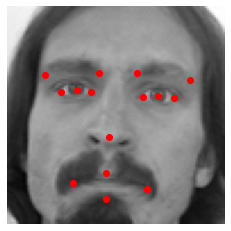

In [6]:
images, keypoints = get_image_and_keypoints_from_raw_observation(df_train.iloc[0], preprocess=True)
show_image_with_keypoints(images, keypoints)

### Missing values

In [7]:
df_train.isna().sum().sort_values(ascending=False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
right_eyebrow_inner_end_y    4779
left_eyebrow_inner_end_y     4779
left_eyebrow_inner_end_x     4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_x              10
left_eye_center_y              10
nose_tip_y                      0
nose_tip_x    

There are a lot of missing values in the data, especially in more sophisticated features. We can impute them using other models, or just ignore the value of loss function for them. Since all the missing values appear in target variables, for now we will not impute them, and rather just omit calculating loss for these observations. Hence, no actions will be taken as of now.

### Duplicates

In [8]:
duplicates_count = df_train.duplicated(subset = 'Image', keep='last').sum()
print(f'There are {duplicates_count} duplicates in the dataset.')

There are 555 duplicates in the dataset.


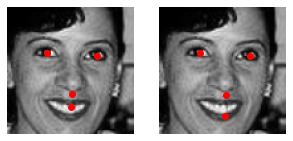

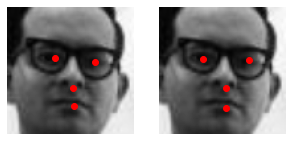

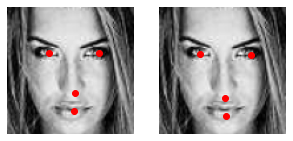

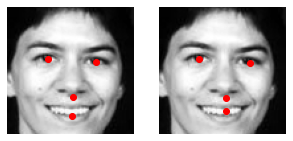

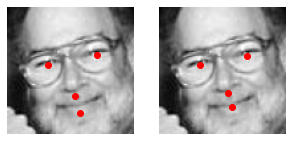

In [9]:
visualize_duplicates(df_train)

There is no clear automatic way of picking better option. Thus, the best way would be to calculate some sort of aggregate for every feature. For lack of a better candidate, let's go with the mean value.

## Preprocessing

In [10]:
preprocessor_train = Preprocessor(df_train)
preprocessor_test = Preprocessor(df_test)

In [11]:
print('Preprocessing train dataset..')
preprocessor_train.preprocess_dataset()
df_train = preprocessor_train.df

Preprocessing train dataset..
Handling duplicates...done.
Transforming image column...done.


In [12]:
print('Preprocessing test dataset..')
df_test = preprocessor_test.preprocess_dataset()
df_test = preprocessor_test.df

Preprocessing test dataset..
Handling duplicates...done.
Transforming image column...done.


In [13]:
print("shape of the train dataset after preprocessing: ", df_train.shape)
print("shape of the test dataset after preprocessing: ", df_test.shape)

shape of the train dataset after preprocessing:  (6494, 31)
shape of the test dataset after preprocessing:  (1752, 2)


### Visualizations after preprocessing

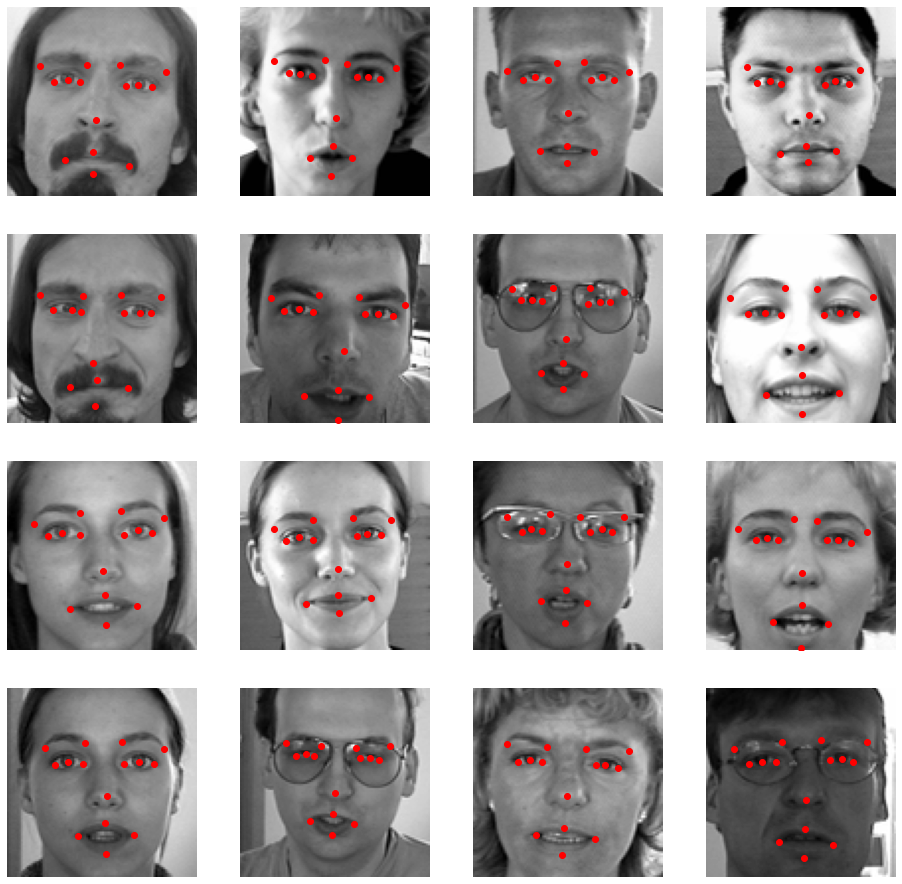

In [14]:
fig = plt.figure(figsize=(16,16))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    image, keypoints = get_image_and_keypoints_from_raw_observation(df_train.iloc[i])
    show_image_with_keypoints(image, keypoints)

## Augmentation

In [16]:
# helper functions
import cv2
import math
from typing import Tuple, List
def rotate_point(origin: Tuple[float, float], point: Tuple[float, float], angle: float) -> Tuple[float, float]:
    xo, yo = origin
    xp, yp = point

    x_final = xo + math.cos(math.radians(angle)) * (xp - xo) - math.sin(math.radians(angle)) * (yp - yo)
    y_final = yo + math.sin(math.radians(angle)) * (xp - xo) + math.cos(math.radians(angle)) * (yp - yo)
    return x_final, y_final

def rotate_image(image: List[float], angle: float) -> List[float]:
    image_center_coordinates = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(image_center_coordinates, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

def translate_image(image: List[float], translatation_params: List[float]) -> List[float]:
    y, x = image.shape[0], image.shape[1]

    xp = x * translatation_params[0]
    yp = y * translatation_params[1]

    M = np.float32([[1, 0, xp], [0, 1, yp]])
    shifted_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted_image

In [57]:
from torchvision.utils import _log_api_usage_once
from typing import Dict
class ImageFlip(object):
    def __init__(self, probability_threshold: float = 0.5):
        super().__init__()
        _log_api_usage_once(self)
        self.probability_threshold = probability_threshold

    def __call__(self, image_with_keypoints: Dict[np.array, np.array]) -> Dict[np.array, np.array]:
        if np.random.random() < self.probability_threshold:
            image, keypoints = image_with_keypoints["image"], image_with_keypoints["keypoints"]
            # image flip
            flipped_image = np.fliplr(image)

            # keypoints flip
            image_width = image.shape[0]
            reorder = [2, 3, 0, 1, 8, 9, 10, 11, 4, 5, 6, 7, 16, 17, 18, 19, 12, 13, 14, 15, 20, 21, 24, 25, 22, 23, 26, 27, 28, 29] # reorder of the keypoints to obtain symmetrical positions
            flipped_keypoints = np.array([keypoints[i] for i in reorder])
            
            # apply additional transformations
            for i in range(0, 29, 2):
                flipped_keypoints[i] = image_width - flipped_keypoints[i]

            return {'image': flipped_image, 'keypoints': flipped_keypoints}

        return image_with_keypoints

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(p={self.probability_threshold})"

In [77]:
class ImageRotation(object):
    def __init__(self, probability_threshold: float = 0.5, angle: float = 30):
        super().__init__()
        _log_api_usage_once(self)
        self.probability_threshold = probability_threshold
        self.angle = angle

    def __call__(self, image_with_keypoints: Dict[np.array, np.array]) -> Dict[np.array, np.array]:
        if np.random.random() < self.probability_threshold:
            image, keypoints = image_with_keypoints["image"], image_with_keypoints["keypoints"]
            # image rotation
            rotated_image = rotate_image(image, -self.angle)
            
            # keypoints rotation
            image_width, image_height = image.shape[0], image.shape[1]
            origin = (image_width / 2, image_height / 2)
            rotated_keypoints = np.copy(keypoints)
            for i, point in enumerate(keypoints.reshape(15, 2)):
                new_keypoint = rotate_point(origin, point, self.angle)
                rotated_keypoints[i * 2] = new_keypoint[0]
                rotated_keypoints[i * 2 + 1] = new_keypoint[1]
        
            return {'image': rotated_image, 'keypoints': rotated_keypoints}

        return image_with_keypoints

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(p={self.probability_threshold})"

In [59]:
class ImageTranslation(object):
    def __init__(self, translation_params: Tuple[float, float], probability_threshold: float = 0.5):
        super().__init__()
        _log_api_usage_once(self)
        self.probability_threshold = probability_threshold
        self.translation_params = translation_params

    def __call__(self, image_with_keypoints: Dict[np.array, np.array]) -> Dict[np.array, np.array]:
        if np.random.random() < self.probability_threshold:
            image, keypoints = image_with_keypoints["image"], image_with_keypoints["keypoints"]
            image_width, image_height = image.shape[0], image.shape[1]
            x_translate_rate, y_translate_rate = self.translation_params
            x_translate_pixel = image_width * x_translate_rate        
            y_translate_pixel = image_height * y_translate_rate

            # image translation
            translation_matrix = np.float32([[1, 0, x_translate_pixel], [0, 1, y_translate_pixel]])
            translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
            
            # keypoints translation
            translated_keypoints = np.copy(keypoints)
            for i in range(len(keypoints)//2):
                translated_keypoints[2 * i] = keypoints[2 * i] + x_translate_pixel
                translated_keypoints[2 * i + 1] = keypoints[2 * i + 1] + y_translate_pixel
            return {'image': translated_image, 'keypoints': translated_keypoints}

        return image_with_keypoints

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(p={self.probability_threshold})"

In [60]:
class ImageBrightness(object):
    def __init__(self, brightness: float, probability_threshold: float = 0.5):
        super().__init__()
        _log_api_usage_once(self)
        self.probability_threshold = probability_threshold
        self.brightness = brightness

    def __call__(self, image_with_keypoints: Dict[np.array, np.array]) -> Dict[np.array, np.array]:
        if np.random.random() < self.probability_threshold:
            image, keypoints = image_with_keypoints["image"], image_with_keypoints["keypoints"]
            hsv = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2HSV)
            h, s, v = cv2.split(hsv)
            lim = 255 - self.brightness
            v[v > lim] = 255
            v[v <= lim] += self.brightness
            final_hsv = cv2.merge((h, s, v))
            img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
            brightened_image = np.clip(img, 0.0, 1.0)
            return {'image': brightened_image, 'keypoints': keypoints}

        return image_with_keypoints

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(p={self.probability_threshold})"

In [61]:
# class Augmentor:
#     def __init__(self, probability_threshold: float = 0.5) -> None:
#         self.probability_threshold = probability_threshold

#     def augment(self, image: np.array[float], keypoints: np.array[float]):
#         for func in [self.flip_image, self.rotate_image, self.translate_image, self.brighten_image]:
#             p = np.random.random()
            

    
#     def flip_image(self, image: np.array[float], keypoints: np.array[float]) -> Tuple[np.array[float], np.array[float]]:
#         # image flip
#         flipped_image = np.fliplr(image)

#         # keypoints flip
#         image_width = image.shape[0]
#         reorder = [2, 3, 0, 1, 8, 9, 10, 11, 4, 5, 6, 7, 16, 17, 18, 19, 12, 13, 14, 15, 20, 21, 24, 25, 22, 23, 26, 27, 28, 29] # reorder of the keypoints to obtain symmetrical positions
#         flipped_keypoints = np.array([keypoints[i] for i in reorder])
#         # apply additional transformations
#         for i in range(0, 29, 2):
#             flipped_keypoints[i] = image_width - flipped_keypoints[i]
#         return flipped_image, flipped_keypoints

#     def rotate_image(self, image: np.array[float], keypoints: np.array[float], angle: float) -> Tuple[np.array[float], np.array[float]]:
#         if not angle:
#             angle = np.random.random(-45, 45)
#         # image rotation
#         rotated_image = rotate_image(image, angle)
        
#         # keypoints rotation
#         image_width, image_height = image.shape[0], image.shape[1]
#         origin = (image_width / 2, image_height / 2)
#         rotated_keypoints = np.copy(keypoints)
#         for i, point in enumerate(keypoints.reshape(15, 2)):
#             new_keypoint = rotate_point(origin, point, angle)
#             rotated_keypoints[i * 2] = new_keypoint[0]
#             rotated_keypoints[i * 2 + 1] = new_keypoint[1]
        
#         return rotated_image, rotated_keypoints
    
#     def translate_image(self, image: np.array[float], keypoints: np.array[float], translatation_params: Tuple[float, float]) -> Tuple[List[float], np.array[float]]:
#         image_width, image_height = image.shape[0], image.shape[1]
#         if not translatation_params:
#             x_translate_rate = np.random.uniform(0, 1)
#             y_translate_rate = np.random.uniform(0, 1)
#         else:
#             x_translate_rate, y_translate_rate = translatation_params
#         x_translate_pixel = image_width * x_translate_rate        
#         y_translate_pixel = image_height * y_translate_rate

#         # image translation
#         translation_matrix = np.float32([[1, 0, x_translate_pixel], [0, 1, y_translate_pixel]])
#         translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
        
#         # keypoints translation
#         translated_keypoints = np.copy(keypoints)
#         for i in range(len(keypoints)//2):
#             translated_keypoints[2 * i] = keypoints[2 * i] + x_translate_pixel
#             translated_keypoints[2 * i + 1] = keypoints[2 * i + 1] + y_translate_pixel
#         return translated_image, translated_keypoints
    
#     def brighten_image(self, image: np.array[float], keypoints: np.array[float], brightness: float) -> Tuple[np.array[float], np.array[float]]:
#         if not brightness:
#             brightness = np.random.uniform(0, 1)
#         hsv = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)
#         lim = 255 - brightness
#         v[v > lim] = 255
#         v[v <= lim] += brightness
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
#         brightened_image = np.clip(img, 0.0, 1.0)
#         return brightened_image, keypoints




### Testing augmentation

In [78]:
image, keypoints = get_image_and_keypoints_from_raw_observation(df_train.iloc[0])
datapoint = {"image": np.stack((image, image, image), axis=-1), "keypoints": keypoints.reshape(30, 1)}
image = datapoint['image']
keypoints = datapoint['keypoints']

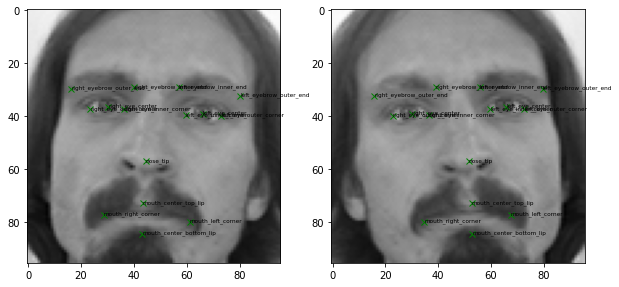

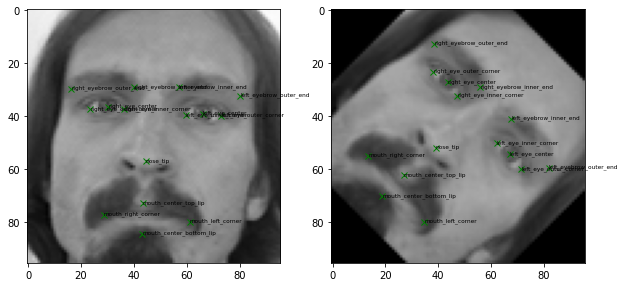

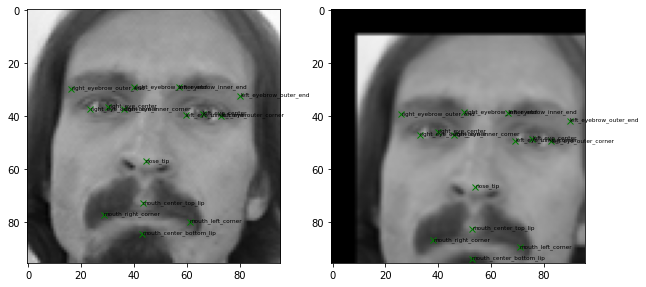

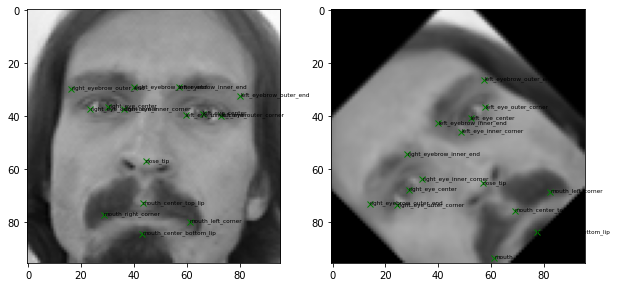

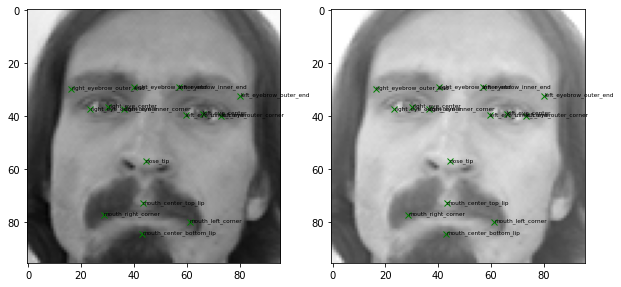

In [79]:
keypoints_columns = df_train.columns[:-1]
random_flip = ImageFlip(probability_threshold=1.0)
random_rotation = ImageRotation(angle=45, probability_threshold=1.0)
random_translation = ImageTranslation(translation_params = (0.1, 0.1), probability_threshold=1.0)
random_brightness = ImageBrightness(brightness=0.2, probability_threshold=1.0)

transform_flip = random_flip(datapoint)
transform_rotation = random_rotation(datapoint)
transform_translation = random_translation(datapoint)
transform_combined = random_flip(random_rotation(random_translation(datapoint)))
transform_brightness = random_brightness(datapoint)

transforms_list = [transform_flip, transform_rotation, transform_translation, transform_combined, transform_brightness]

for transformed_image_with_keypoints in transforms_list:
    transformed_image = transformed_image_with_keypoints["image"]
    transformed_keypoints = transformed_image_with_keypoints["keypoints"]

    fig = plt.figure(figsize=(10, 20))
    # Plot original image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    for i, keypoint_name in enumerate(keypoints_columns[::2]):
        plt.annotate(keypoint_name[:-2],
                     (keypoints[2 * i], keypoints[2 * i + 1]),
                     fontsize='xx-small')
    plt.plot(keypoints.reshape((15, 2))[:, 0],
             keypoints.reshape((15, 2))[:, 1], 'gx')
    # Plot flipped image
    fig.add_subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    for i, keypoint_name in enumerate(keypoints_columns[::2]):
        plt.annotate(keypoint_name[:-2],
                     (transformed_keypoints[2 * i], transformed_keypoints[2 * i + 1]),
                     fontsize='xx-small')
    plt.plot(transformed_keypoints.reshape((15, 2))[:, 0],
             transformed_keypoints.reshape((15, 2))[:, 1], 'gx')

    plt.show()

In [ ]:
#TODO
# creating Dataset object for PyTorch, data augmentation etc.

## Modeling

In [ ]:
#TODO
# testing few models, hyperparameters tuning etc.